In [21]:
# Packages necessary for the project
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

In [22]:
# Defining the relevant constants
stoptime = 1.7e-10
numpoints = 5000
t0 = np.linspace(0, stoptime, numpoints)
mc2 = 0.511 
F0 = 1e3
alpha = 5e6
c = 3e8
m = mc2 / c**2

# I need to also make sure that 'x' is properly converted into meters 
# maybe I should make a version that works entirely in SI
#TODO: Check the units of the parameters I gave in the initial conditions
#TODO: make the 3D graph look nicer, rn it's horrible

In [23]:
# Q19

# reference on how to solve a system of coupled ODEs: 
# https://scipy-cookbook.readthedocs.io/items/CoupledSpringMassSystem.html
def vectorfield(w, t, p):
    """
    Defines the differential equations for the acceleration of the electron close to c

    Arguments:
        w :  vector of the state variables:
                  w = [x,y,z,px,py,pz]
        t :  time
        p :  vector of the parameters:
                  p = [m,alpha,F0,c]
    """
    x, y, z, px, py, pz = w
    m, alpha, F0, c = p
    gamma = np.sqrt(1 + (px**2+py**2+pz**2)/(m**2*c**2))
    # Create f = (x', y', z', px', py', pz'):
    f = [px/(gamma*m),
         py/(gamma*m),
         pz/(gamma*m),
         F0,
         -alpha*y,
         -alpha*z]
    return f

In [24]:
# Initial conditions
# x0,y0,z0: initial positions
# px0,py0,pz0: initial components of the momentum
x0 = 0
y0 = 1e-4 # check dimensions
z0 = 0
px0 = 10*m*c
py0 = 0
pz0 = 2*m*c


# ODE solver parameters
abserr = 1.0e-16
relerr = 1.0e-6
dt = stoptime / numpoints

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m, alpha, F0, c]
w0 = [x0, y0, z0, px0, py0, pz0]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('data3.txt', 'w') as outfile:
    for t1, w1 in zip(t, wsol):
        # could also print f if needed
        outfile.write(', '.join([str(x) for x in [t1, w1[0], w1[1], w1[2], w1[3], w1[4], w1[5]]]) + '\n')

In [25]:
filling_values = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
data = np.genfromtxt('data3.txt', delimiter=', ', filling_values=filling_values) 
t, x, y, z, px, py, pz = data[:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6]
p = np.sqrt(px**2 + py**2 + pz**2)
E = np.sqrt(mc2**2 + c**2*p**2)

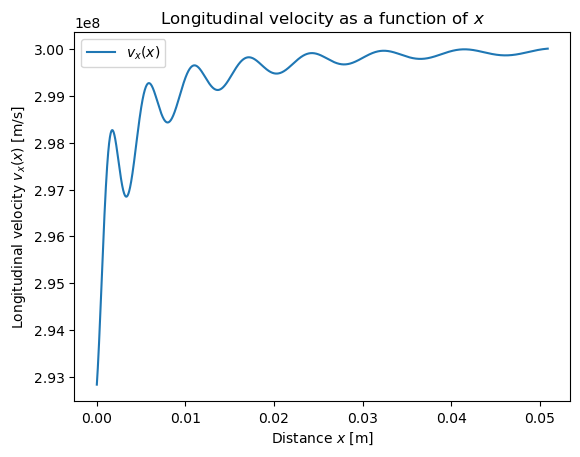

In [26]:
# Q19.3 - v_x(x)

velocity_x = np.diff(x) / dt

plt.plot(x[1:], velocity_x[:], label=r'$v_x(x)$')
plt.xlabel(r'Distance $x$ [m]')
plt.ylabel(r'Longitudinal velocity $v_x(x)$ [m/s]')
plt.title(r'Longitudinal velocity as a function of $x$')
plt.legend()
plt.show()


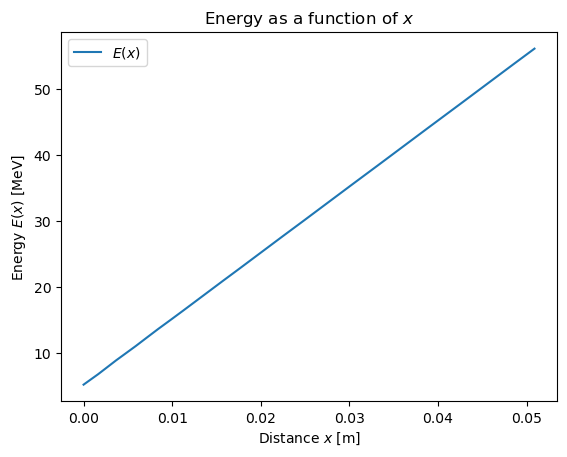

In [27]:
# Q19.3 - E(x)

plt.plot(x, E, label=r'$E(x)$')
plt.xlabel(r'Distance $x$ [m]')
plt.ylabel(r'Energy $E(x)$ [MeV]')
plt.title(r'Energy as a function of $x$')
plt.legend()
plt.show()

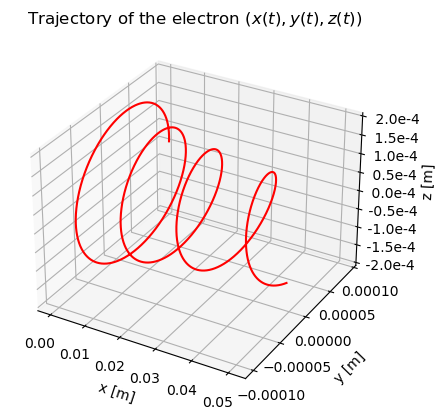

In [28]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
ax.plot3D(x, y, z, 'red')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title(r'Trajectory of the electron $(x(t), y(t), z(t))$')
ax.yaxis.labelpad=10
ax.zaxis.labelpad=10
ax.set_zlim3d(bottom=-0.0002, top=0.0002)
ax.set_ylim3d(bottom=-0.00011, top=0.0001)
ax.set_zlabel('z [m]')
ax.set_zticks(np.linspace(-2e-4, 2e-4, 9),
    labels=[f"    {str((x*10**4).round(2))}e-4"
            for x in np.linspace(-2e-4, 2e-4, 9)])
plt.show()

Qualitatively, the motion of the electron has two important features. First of all, we see that the displacements along the $x$-axis are roughly 2 orders of magnitude bigger than the displacements along the $y$ and $z$-axes. The motion along the $y$- and $z$- axes is oscillatory because of the restoring force $\vec{F}_{\perp}=-\alpha(y\vec{e}_y+z\vec{e}_z)$. The motion along the $x$ axis is accelerated, since the component of the force along this axis is $F_0\vec{e}_x$. Newton's second law reads 
$$F_0\vec{e}_x=\dfrac{\mathrm{d}\vec{p}}{\mathrm{d}t}\cdot \vec{e}_x=\dfrac{\mathrm{d}}{\mathrm{d}t}\left(\gamma m \vec{v}\right)\cdot \vec{e}_x$$
and thus 
$$p_x=\gamma m v_x=\dfrac{m v_x}{\sqrt{1-\dfrac{v_x^2+v_y^2+v_z^2}{c^2}}}=F_0t$$
In the nonrelativistic limit $v\ll c$, this would boil down to uniformly accelerated motion along the $x$-axis with acceleration $a=F_0/m$. For the relativistic case, this is not quite the same. If one assumes that $v_y, v_z\ll v_x$, which is the case for our initial conditions, then we obtain the approximate equation
$$m^2v_x^2=F_0^2t^2\left (1-\dfrac{v_x^2}{c^2}\right )$$
$$v_x^2=\frac{F_0^2t^2}{m^2c^2}\left (c^2-v_x^2\right )$$
$$v_x=\dfrac{F_0ct}{\sqrt{m^2c^2+F_0^2t^2}}$$
which reduces in fact to the calculation for **Case 1**. 

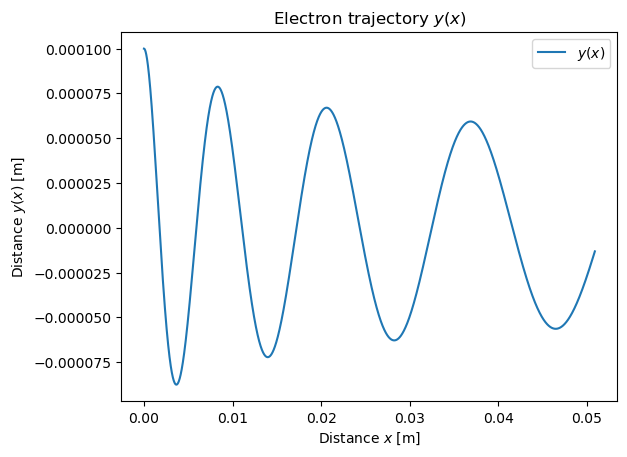

In [29]:
# The 2D trajectory
plt.plot(x, y, label=r'$y(x)$')
plt.xlabel(r'Distance $x$ [m]')
plt.ylabel(r'Distance $y(x)$ [m]')
plt.title(r'Electron trajectory $y(x)$')
plt.legend()
plt.show()